In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2023-12-21'
stock = 'TSLA'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2023-12-14,241.220001,253.880005,240.789993,251.050003,251.050003,160829200
2023-12-15,251.210007,254.130005,248.300003,253.500000,253.500000,135720800
2023-12-18,253.779999,258.739990,251.360001,252.080002,252.080002,116416500


In [5]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
1,2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2,2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
3,2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
4,2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...,...
3007,2023-12-14,241.220001,253.880005,240.789993,251.050003,251.050003,160829200
3008,2023-12-15,251.210007,254.130005,248.300003,253.500000,253.500000,135720800
3009,2023-12-18,253.779999,258.739990,251.360001,252.080002,252.080002,116416500
3010,2023-12-19,253.479996,258.339996,253.009995,257.220001,257.220001,106737400


In [6]:
# Moving average of 100 days at the close price
ma_100days = data.Close.rolling(100).mean()

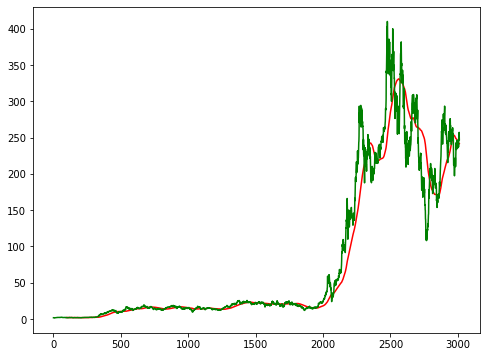

In [7]:
# Plotting it
plt.figure(figsize=(8,6))
plt.plot(ma_100days, 'r') 
plt.plot(data.Close, 'g')
plt.show()

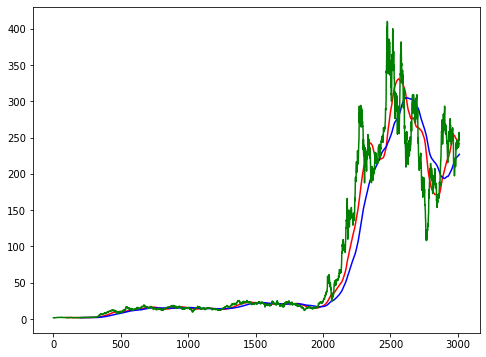

In [8]:
# Moving avg of 200 days
ma_200days = data.Close.rolling(200).mean()

# Plotting it
plt.figure(figsize=(8,6))
plt.plot(ma_100days, 'r') 
plt.plot(ma_200days,'b')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
# Data cleanup
data.dropna(inplace=True)
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Splitting the data for train and test
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.8): len(data)])
data_train.shape

(2409, 1)

In [11]:
data_test.shape

(603, 1)

In [12]:
# Scaling the stock price
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
# To predict nth day stock price, we need the data for the past 100 days
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [15]:
# Convering x, y to numpy arrays
x, y = np.array(x), np.array(y)

In [16]:
# import libraries
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
# Creating a neural network with 4 layers

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True),
          input_shape=(x.shape[1],1))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=80, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x, y, epochs=50, batch_size=32, verbose=1)

In [ ]:
# Summarizing the model
model.summary()

In [ ]:
# Taking last 100 days data as input
past_100days = data_train.tail(100)

# Concatenating it to test data
New_testdata = pd.concat([past_100days, data_test], ignore_index=True)

#Checking test data
New_testdata

In [ ]:
# Scaling and Fitting test data
data_test_scale = scaler.fit_transform(New_testdata)

In [ ]:
# To predict nth day stock price, we need the test data for the past 100 days
x = []
y = []

for i in range(100, New_testdata.shape[0]):
    x.append(New_testdata[i-100:i])
    y.append(New_testdata[i,0])

# Convering x, y to numpy arrays
x, y = np.array(x), np.array(y)

In [ ]:
Y_pred = model.predict(x)

In [ ]:
# To get the actual stock price
scale = 1/scaler.scale_

Y_pred = Y_pred * scale

y = y * scale

In [ ]:
# Plotting predicted vs actual price

plt.figure(figsize=(10,8))
plt.plot(Y_pred, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Saving the model
model.save('Stock Market Prediction.keras')